In [1]:
library(tidyverse)
library(dplyr)
library(readxl)
library(ggpubr)
library(lme4)
library(ggplot2)
library(broom)
library(purrr)
library(cowplot)
library(grid)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x dplyr::recode() masks car::recode()
x purrr::some()   masks car::some()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack



Attaching package: 'cowplot'


The following object is masked from 'package:ggpubr':

    get_legend


The following object is masked from 'package:lubridate':

    stamp




# Data Analysis
![image](image/vaccine.jpg)

## 1. Load Data

In [2]:
patient_df <- read.delim("/Users/jennylee/Downloads/MGH_Olink_COVID_Apr_27_2021/MGH_COVID_Clinical_Info.txt", header=TRUE, sep=";")
head(patient_df)
print(paste0("This dataframe has ", nrow(patient_df), " rows in total."))
glimpse(patient_df)

,subject_id,COVID,Age_cat,BMI_cat,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,...,crp_3_cat,ddimer_3_cat,ldh_3_cat,abs_neut_7_cat,abs_lymph_7_cat,abs_mono_7_cat,creat_7_cat,crp_7_cat,ddimer_7_cat,ldh_7_cat
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,1,4,0,0,0,0,0,0,...,1,1,1,NA,NA,NA,NA,NA,NA,NA
2,2,1,2,2,0,0,0,0,0,0,...,2,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,3,1,3,4,0,1,0,0,0,0,...,3,2,3,NA,NA,NA,NA,NA,NA,NA
4,4,1,1,2,0,0,0,0,0,0,...,2,2,3,NA,NA,NA,NA,NA,NA,NA
5,5,1,3,3,0,0,0,1,1,0,...,5,3,NA,3,5,3,1,4,4,3
6,6,1,1,1,1,0,0,0,0,0,...,4,3,5,3,3,2,1,4,5,5


[1] "This dataframe has 384 rows in total."
Rows: 384
Columns: 44
$ subject_id      <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,~
$ COVID           <int> 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, ~
$ Age_cat         <int> 1, 2, 3, 1, 3, 1, 2, 4, 5, 2, 3, 2, 4, 4, 4, 3, 3, 2, ~
$ BMI_cat         <int> 4, 2, 4, 2, 3, 1, 2, 3, 2, 2, 2, 4, 4, 3, 2, 3, 1, 2, ~
$ HEART           <int> 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ~
$ LUNG            <int> 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, ~
$ KIDNEY          <int> 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ~
$ DIABETES        <int> 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ~
$ HTN             <int> 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, ~
$ IMMUNO          <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, ~
$ Resp_Symp       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ~
$ Fever_Sympt     <int> 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 

In [3]:
protein_df <- read.delim("/Users/jennylee/Downloads/MGH_Olink_COVID_Apr_27_2021/MGH_COVID_OLINK_NPX.txt", header=TRUE, sep=";")
head(protein_df)
print(paste0("This dataframe has ", nrow(protein_df), " rows in total."))
glimpse(protein_df)

,SampleID,subject_id,Timepoint,Index,OlinkID,UniProt,Assay,MissingFreq,Panel,Panel_Lot_Nr,PlateID,QC_Warning,Assay_Warning,Normalization,LOD,NPX
,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,1_D0,1,D0,56,OID21311,Q9BTE6,AARSD1,0.0000,Oncology,B04404,20200772_Plate5,PASS,PASS,Intensity,-1.0810,1.9024
2,1_D0,1,D0,56,OID20921,Q96IU4,ABHD14B,0.0000,Neurology,B04406,20200772_Plate5,PASS,PASS,Intensity,-1.4574,-0.2625
3,1_D0,1,D0,56,OID21280,P00519,ABL1,0.0013,Oncology,B04404,20200772_Plate5,PASS,PASS,Intensity,-2.4697,0.2659
4,1_D0,1,D0,56,OID21269,P09110,ACAA1,0.1248,Oncology,B04404,20200772_Plate5,PASS,PASS,Intensity,-0.2027,0.5311
5,1_D0,1,D0,56,OID20159,P16112,ACAN,0.0000,Cardiometabolic,B04405,20200772_Plate5,PASS,PASS,Intensity,-3.3481,-2.0366
6,1_D0,1,D0,56,OID20105,Q9BYF1,ACE2,0.0561,Cardiometabolic,B04405,20200772_Plate5,PASS,PASS,Intensity,-1.9055,-1.4261


[1] "This dataframe has 1271808 rows in total."
Rows: 1,271,808
Columns: 16
$ SampleID      <chr> "1_D0", "1_D0", "1_D0", "1_D0", "1_D0", "1_D0", "1_D0", ~
$ subject_id    <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,~
$ Timepoint     <chr> "D0", "D0", "D0", "D0", "D0", "D0", "D0", "D0", "D0", "D~
$ Index         <int> 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, ~
$ OlinkID       <chr> "OID21311", "OID20921", "OID21280", "OID21269", "OID2015~
$ UniProt       <chr> "Q9BTE6", "Q96IU4", "P00519", "P09110", "P16112", "Q9BYF~
$ Assay         <chr> "AARSD1", "ABHD14B", "ABL1", "ACAA1", "ACAN", "ACE2", "A~
$ MissingFreq   <dbl> 0.0000, 0.0000, 0.0013, 0.1248, 0.0000, 0.0561, 0.8127, ~
$ Panel         <chr> "Oncology", "Neurology", "Oncology", "Oncology", "Cardio~
$ Panel_Lot_Nr  <chr> "B04404", "B04406", "B04404", "B04404", "B04405", "B0440~
$ PlateID       <chr> "20200772_Plate5", "20200772_Plate5", "20200772_Plate5",~
$ QC_Warning    <chr> "PASS", "PASS", "PASS"

### 1.1 Join the Two Data Frames

In [4]:
join_df <- inner_join(patient_df, protein_df, by="subject_id")
nrow(join_df)
head(join_df)

[1] 1154048

,subject_id,COVID,Age_cat,BMI_cat,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,...,Assay,MissingFreq,Panel,Panel_Lot_Nr,PlateID,QC_Warning,Assay_Warning,Normalization,LOD,NPX
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,1,1,1,4,0,0,0,0,0,0,...,AARSD1,0.0000,Oncology,B04404,20200772_Plate5,PASS,PASS,Intensity,-1.0810,1.9024
2,1,1,1,4,0,0,0,0,0,0,...,ABHD14B,0.0000,Neurology,B04406,20200772_Plate5,PASS,PASS,Intensity,-1.4574,-0.2625
3,1,1,1,4,0,0,0,0,0,0,...,ABL1,0.0013,Oncology,B04404,20200772_Plate5,PASS,PASS,Intensity,-2.4697,0.2659
4,1,1,1,4,0,0,0,0,0,0,...,ACAA1,0.1248,Oncology,B04404,20200772_Plate5,PASS,PASS,Intensity,-0.2027,0.5311
5,1,1,1,4,0,0,0,0,0,0,...,ACAN,0.0000,Cardiometabolic,B04405,20200772_Plate5,PASS,PASS,Intensity,-3.3481,-2.0366
6,1,1,1,4,0,0,0,0,0,0,...,ACE2,0.0561,Cardiometabolic,B04405,20200772_Plate5,PASS,PASS,Intensity,-1.9055,-1.4261


### 1.2 Number of Unique Proteins per Patient

In [5]:
num_patient <- length(unique(patient_df$subject_id))
paste0("The study involves a total of ", num_patient, " unique patients.")

[1] "The study involves a total of 384 unique patients."

In [6]:
count_unique_entries_per_patient <- function(data, col_name) {
      result <- data |>
            group_by(subject_id) |>
            summarise(!!paste0("unique_", col_name) := n_distinct(.data[[col_name]]))
      print(paste0("Total number of unique ", col_name, " entries is: ", length(unique(result[[paste0("unique_", col_name)]]))))
      return(result)
}

head(count_unique_entries_per_patient(join_df, "UniProt"))

[1] "Total number of unique UniProt entries is: 1"


subject_id,unique_UniProt
<int>,<int>
1,1463
2,1463
3,1463
4,1463
5,1463
6,1463


In [7]:
head(count_unique_entries_per_patient(join_df, "Assay"))

[1] "Total number of unique Assay entries is: 1"


subject_id,unique_Assay
<int>,<int>
1,1463
2,1463
3,1463
4,1463
5,1463
6,1463


We can confidently state that a total of 384 patients were tested for the presence and NPX levels of 1,463 unique proteins.

## 2. Statistical Testing

### 2.1 NPX Level Variations Associated with COVID Status

In [8]:
compute_cohens_d <- function(g1, g2) {
      g1_mean <- mean(g1)
      g2_mean <- mean(g2)
      g1_sd <- sd(g1)
      g2_sd <- sd(g2)

      g1_n <- length(g1)
      g2_n <- length(g2)
      pooled_sd <- sqrt(((g1_n - 1) * g1_sd^2 + (g2_n - 1) * g2_sd^2) / (g1_n + g2_n - 2))

      cohens_d <- (g1_mean - g2_mean) / pooled_sd
      return(cohens_d)
}

compare_t_test <- function(data) {
  results <- data |>
    group_by(UniProt) |>
    summarise(
      t_test=list(t.test(NPX ~ COVID, data = cur_data())),
      .groups="drop"
    ) |>
    mutate(
      p_value=map_dbl(t_test, ~ .x$p.value),
      effect_size=map2_dbl(
        t_test, UniProt,
        ~ {
          g1 <- data$NPX[data$COVID == 1 & data$UniProt == .y]
          g2 <- data$NPX[data$COVID == 0 & data$UniProt == .y]
          compute_cohens_d(g1, g2)
        }
      )
    )

    results <- results |>
      mutate(adjusted_p_value = p.adjust(p_value, method="BH")) |>
      filter(adjusted_p_value < 0.05) |>
      arrange(desc(effect_size))

  return(results)
}

protein_t_test_df <- compare_t_test(join_df)
head(protein_t_test_df)
paste0("After removing non-significant relationships, ", nrow(protein_t_test_df), " proteins remain.")

Warning message:
"There was 1 warning in `summarise()`.
i In argument: `t_test = list(t.test(NPX ~ COVID, data = cur_data()))`.
i In group 1: `UniProt = "A1E959"`.
Caused by warning:
! `cur_data()` was deprecated in dplyr 1.1.0.
i Please use `pick()` instead."


UniProt,t_test,p_value,effect_size,adjusted_p_value
<chr>,<list>,<dbl>,<dbl>,<dbl>
Q6P4E1,"-19.0676049134357 , 107.246339012846 , 3.08531846278037e-36 , -1.27821761147038 , -1.03747096472307 , -1.39862804878049 , -0.240783760683761 , 0 , 0.0607231109178726 , two.sided , Welch Two Sample t-test, NPX by COVID",3.085318e-36,2.004353,1.504607e-33
P20851,"-19.2307242967523 , 117.079075372362 , 4.91697331828671e-38 , -1.84370861636832 , -1.49942354261994 , -1.48119756097561 , 0.190368518518519 , 0 , 0.0869216392320918 , two.sided , Welch Two Sample t-test, NPX by COVID",4.916973e-38,1.799691,3.596766e-35
O95544,"-15.6776739479425 , 110.932290391951 , 6.62514981320112e-30 , -2.03604531994565 , -1.5791079147149 , -0.426517073170732 , 1.38105954415954 , 0 , 0.115296224639721 , two.sided , Welch Two Sample t-test, NPX by COVID",6.625150e-30,1.569932,1.384656e-27
O95786,"-17.1514840624987 , 119.544318254611 , 5.09579967153385e-34 , -2.42476458818021 , -1.92286419369735 , 0.435019512195122 , 2.6088339031339 , 0 , 0.126742058180946 , two.sided , Welch Two Sample t-test, NPX by COVID",5.095800e-34,1.567790,1.491031e-31
Q99538,"-10.8511279836196 , 94.0188848556917 , 2.88828278917016e-18 , -1.14937293286638 , -0.793812627553329 , -1.87294634146341 , -0.901353561253561 , 0 , 0.0895384131194958 , two.sided , Welch Two Sample t-test, NPX by COVID",2.888283e-18,1.486645,1.509128e-16
P02778,"-13.4113932264538 , 103.898604938189 , 2.0955526864621e-24 , -2.35384064474274 , -1.74741340987473 , -0.551664634146341 , 1.49896239316239 , 0 , 0.152901864309213 , two.sided , Welch Two Sample t-test, NPX by COVID",2.095553e-24,1.483567,3.832242e-22


[1] "After removing non-significant relationships, 818 proteins remain."

In [9]:
top_10_proteins <- protein_t_test_df |>
      slice_head(n=10) |>
      pull(UniProt)
top_10_proteins

[1] "Q6P4E1" "P20851" "O95544" "O95786" "Q99538" "P02778" "P80098" "P19971"
 [9] "P20062" "Q10589"

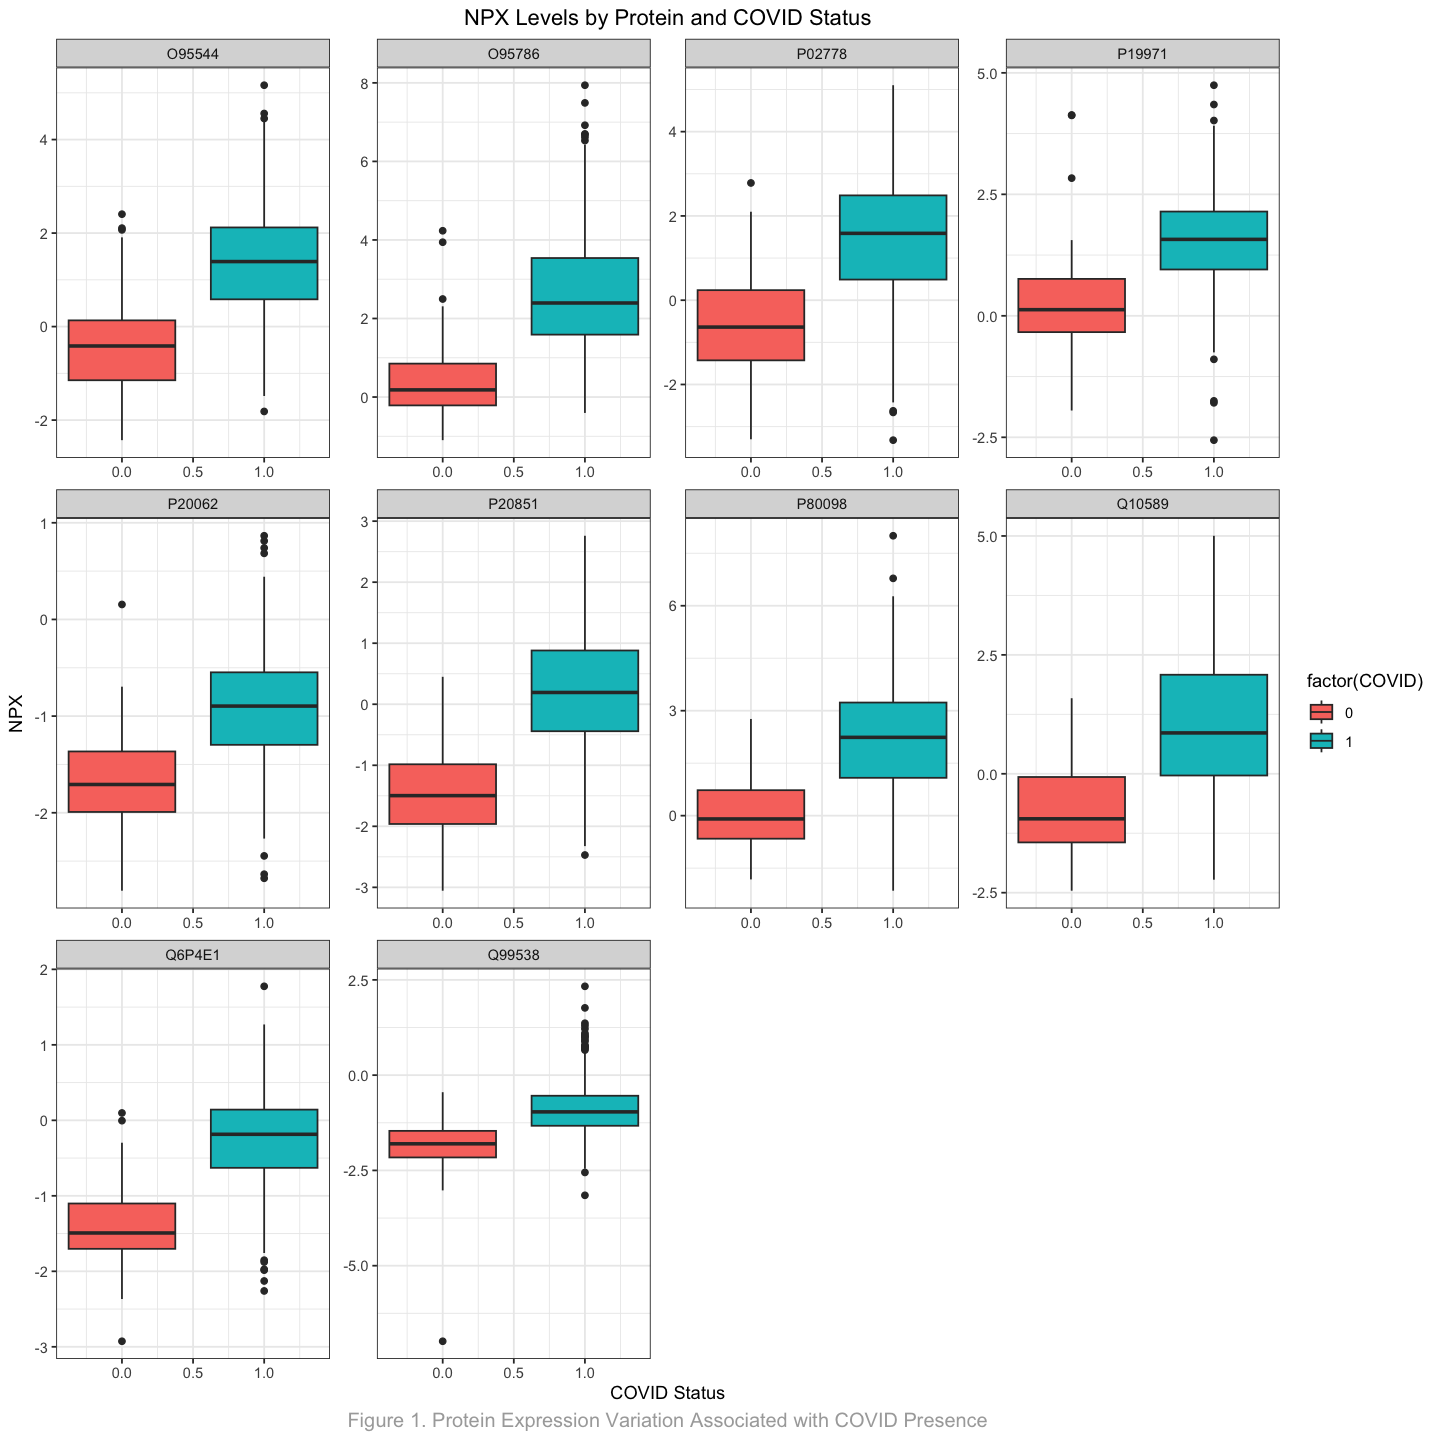

In [10]:
options(repr.plot.width = 12, repr.plot.height = 12)

visualize_top_10_proteins <- join_df |>
      filter(UniProt %in% top_10_proteins) |>
      ggplot(aes(x=COVID, y=NPX, fill=factor(COVID))) +
      geom_boxplot() + 
      labs(title="NPX Levels by Protein and COVID Status",
            x="COVID Status",
            y="NPX",
            caption = "Figure 1. Protein Expression Variation Associated with COVID Presence"
      ) + facet_wrap(~UniProt, scales = "free") +
      theme_bw() + 
      theme(
            plot.title=element_text(hjust = 0.5), 
            plot.caption=element_text(hjust = 0.5, size=12, colour = "darkgrey")) 

visualize_top_10_proteins

In [11]:
pre_existing_conds = c("HEART", "LUNG", "KIDNEY", "DIABETES", "HTN", "IMMUNO", "COVID")
pre_existing_df <- join_df |>
      select(all_of(pre_existing_conds))

for (column in pre_existing_conds) {
      pre_existing_df[[column]] <- factor(pre_existing_df[[column]])
}

head(pre_existing_df)
str(pre_existing_df)

,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,COVID
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
5,0,0,0,0,0,0,1
6,0,0,0,0,0,0,1


'data.frame':	1154048 obs. of  7 variables:
 $ HEART   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ LUNG    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ KIDNEY  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ DIABETES: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HTN     : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ IMMUNO  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ COVID   : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...


In [12]:
compare_pre_existing_conds <- glm(COVID ~ HEART + LUNG + KIDNEY + DIABETES + HTN + IMMUNO,
            data = pre_existing_df,
            family = binomial
      )

pre_existing_summary <- summary(compare_pre_existing_conds)
print(pre_existing_summary)

pre_existing_summary_df <- data.frame(
      Condition = rownames(pre_existing_summary$coefficients),
      Estimate = pre_existing_summary$coefficients[, "Estimate"],
      STD = pre_existing_summary$coefficients[, "Std. Error"],
      Z_value = pre_existing_summary$coefficients[, "z value"],
      p_value = pre_existing_summary$coefficients[, "Pr(>|z|)"]
)

pre_existing_summary_df |>
      filter(p_value < 0.05)


Call:
glm(formula = COVID ~ HEART + LUNG + KIDNEY + DIABETES + HTN + 
    IMMUNO, family = binomial, data = pre_existing_df)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.081029   0.006337  486.20   <2e-16 ***
HEART1      -0.279085   0.007991  -34.93   <2e-16 ***
LUNG1       -1.385784   0.006756 -205.11   <2e-16 ***
KIDNEY1     -0.258386   0.008078  -31.99   <2e-16 ***
DIABETES1    0.424673   0.006998   60.68   <2e-16 ***
HTN1        -0.572461   0.007527  -76.05   <2e-16 ***
IMMUNO1     -1.171622   0.008357 -140.20   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 773343  on 1154047  degrees of freedom
Residual deviance: 688212  on 1154041  degrees of freedom
AIC: 688226

Number of Fisher Scoring iterations: 5



,Condition,Estimate,STD,Z_value,p_value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),(Intercept),3.0810290,0.006336893,486.20502,0.000000e+00
HEART1,HEART1,-0.2790854,0.007990581,-34.92680,2.914718e-267
LUNG1,LUNG1,-1.3857840,0.006756234,-205.11188,0.000000e+00
KIDNEY1,KIDNEY1,-0.2583860,0.008078190,-31.98563,1.727527e-224
DIABETES1,DIABETES1,0.4246733,0.006998466,60.68091,0.000000e+00
HTN1,HTN1,-0.5724614,0.007527214,-76.05224,0.000000e+00
IMMUNO1,IMMUNO1,-1.1716219,0.008356871,-140.19863,0.000000e+00


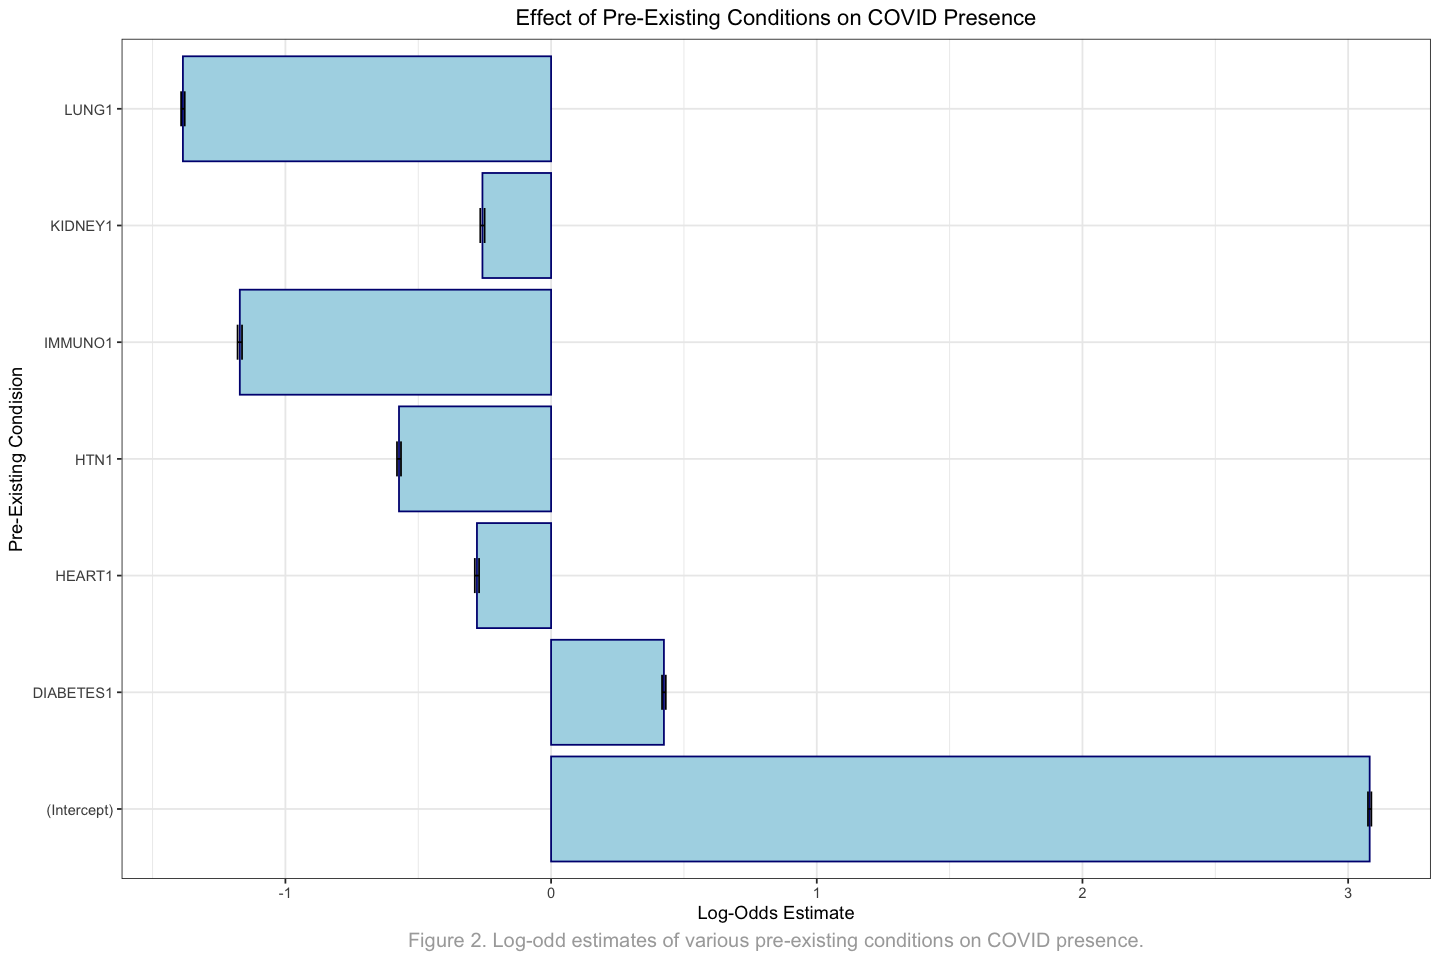

In [13]:
options(repr.plot.width = 12, repr.plot.height = 8)

pre_existing_fig <- ggplot(pre_existing_summary_df, aes(x = Condition, y = Estimate)) +
  geom_bar(stat = "identity", fill = "lightblue", color="navy") +
  geom_errorbar(aes(ymin = Estimate - STD, ymax = Estimate + STD), width = 0.3) +
  theme_bw() +
  ggtitle("Effect of Pre-Existing Conditions on COVID Presence") +
  labs(
    y="Log-Odds Estimate",
    x="Pre-Existing Condision",
    caption = "Figure 2. Log-odd estimates of various pre-existing conditions on COVID presence."
    ) +
  coord_flip() +
  theme_bw() + 
      theme(
            plot.title=element_text(hjust = 0.5), 
            plot.caption=element_text(hjust = 0.5, size=12, colour = "darkgrey")) 

pre_existing_fig

In [14]:
age_df <- join_df |>
  group_by(Age_cat) |>
  summarise(
    total_cases = n(),
    covid_positive = sum(COVID == 1),
    covid_percentage = (covid_positive / total_cases) * 100
  )

bmi_df <- join_df |>
  group_by(BMI_cat) |>
  summarise(
    total_cases = n(),
    covid_positive = sum(COVID == 1),
    covid_percentage = (covid_positive / total_cases) * 100
  )

age_df
bmi_df

Age_cat,total_cases,covid_positive,covid_percentage
<int>,<int>,<int>,<dbl>
1,88320,82432,93.33333
2,216384,206080,95.23810
3,338560,306176,90.43478
4,315008,262016,83.17757
5,195776,176640,90.22556


BMI_cat,total_cases,covid_positive,covid_percentage
<int>,<int>,<int>,<dbl>
0,16192,8832,54.54545
1,203136,156032,76.81159
2,409216,391552,95.68345
3,341504,310592,90.94828
4,141312,128064,90.62500
5,42688,38272,89.65517


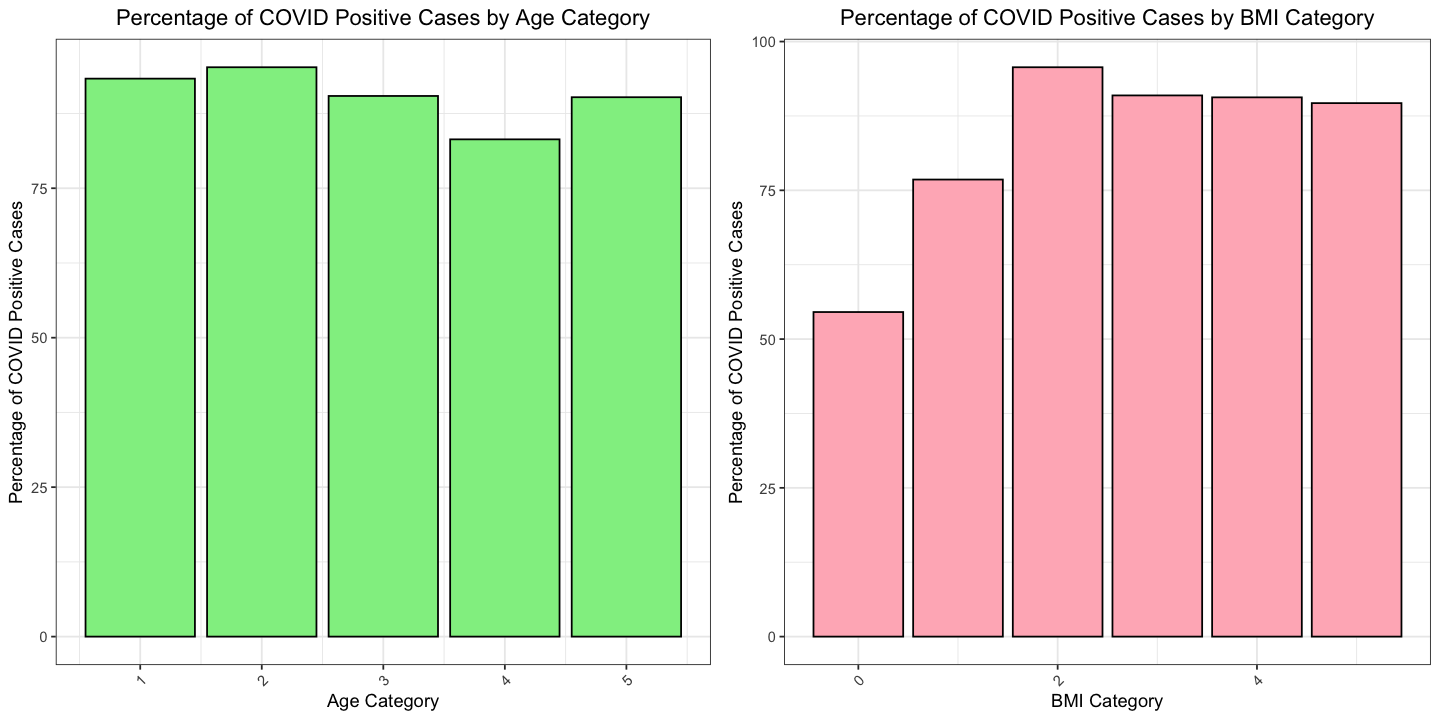

In [24]:
options(repr.plot.width = 12, repr.plot.height = 6)

age_fig <- ggplot(age_df, aes(x = Age_cat, y = covid_percentage)) +
  geom_bar(stat = "identity", position = "dodge", fill="lightgreen", color="black") +
  theme_bw() +
  ggtitle("Percentage of COVID Positive Cases by Age Category") +
  xlab("Age Category") +
  ylab("Percentage of COVID Positive Cases") +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

bmi_fig <- ggplot(bmi_df, aes(x = BMI_cat, y = covid_percentage)) +
  geom_bar(stat = "identity", position = "dodge", fill="lightpink", color="black") +
  theme_bw() +
  ggtitle("Percentage of COVID Positive Cases by BMI Category") +
  xlab("BMI Category") +
  ylab("Percentage of COVID Positive Cases") +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

age_bmi_fig <- plot_grid(age_fig, bmi_fig, ncol=2)
age_bmi_fig

,Chi2,DF,p_value
,<dbl>,<int>,<dbl>
X-squared,22862.47,4,0


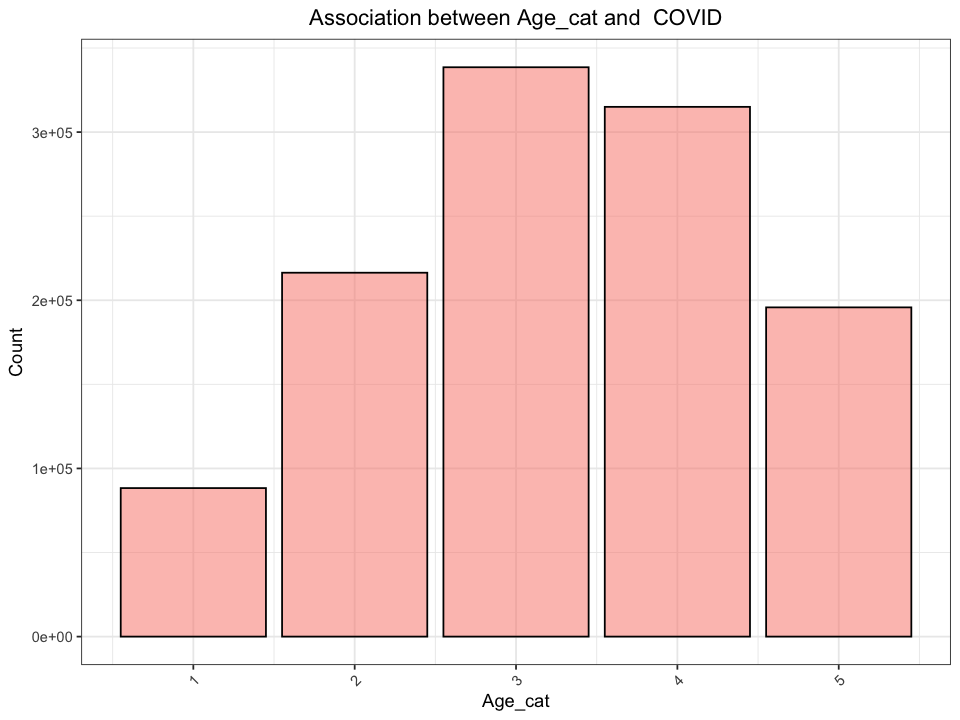

In [40]:
options(repr.plot.width = 8, repr.plot.height = 6)

determine_statistical_relationship <- function(data, col_name) {
      # data$col_name <- factor(data$col_name)

      contingency_table <- table(data[[col_name]], data[["COVID"]])
      chi2_test <- chisq.test(contingency_table)
      result_df <- data.frame(
            Chi2 = chi2_test$statistic,
            DF = chi2_test$parameter,
            p_value = chi2_test$p.value
      )
      fig <- ggplot(data, aes_string(x = col_name)) +
            geom_bar(position = "dodge", fill="salmon", colour="black", alpha=0.5) +
            labs(title = paste0("Association between ", col_name, " and ", " COVID"), 
                  y = "Count") +
            theme_bw() + 
            theme(plot.title = element_text(hjust = 0.5),
                  axis.text.x = element_text(angle = 45, hjust = 1)
            )
      print(fig)

      return(result_df)
}

determine_statistical_relationship(join_df, "Age_cat")

,Chi2,DF,p_value
,<dbl>,<int>,<dbl>
X-squared,73707.03,5,0


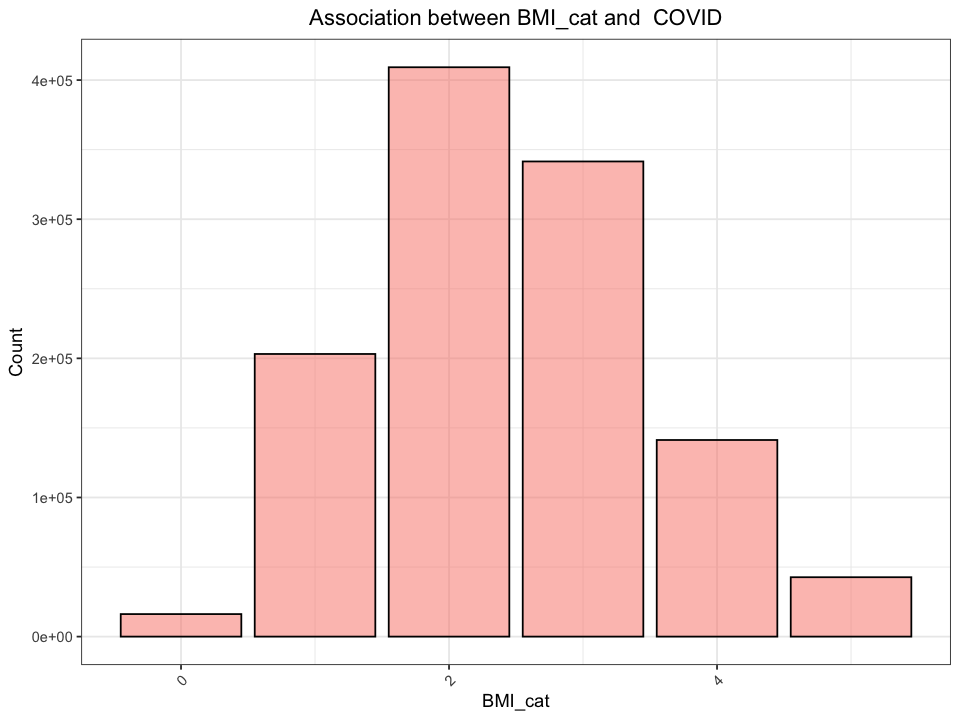

In [41]:
determine_statistical_relationship(join_df, "BMI_cat")

# References